In [ ]:
# Libraries
from nilearn import datasets
import pandas as pd
from nilearn import plotting
import nibabel as nib
import nilearn
from PIL import Image
import matplotlib.pyplot as plt
import tqdm
import os


: 

In [2]:


# Locate the data of the first subject
bold_brainMask='/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
T1w_brainMask='/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/anat/sub-126BPCP021001_ses-1_acq-mprage_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
T1w_masked='/home/mina94/scratch/fixSeed_threads/workdir_mca/workdir_1/fmriprep_23_2_wf/sub_126BPCP021001_wf/bold_ses_1_task_rest_wf/bold_fit_wf/bold_reg_wf/fsl_bbr_wf/mask_t1w_brain/sub-126BPCP021001_ses-1_acq-mprage_desc-preproc_T1w_masked.nii.gz'
coReg='/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_coReg2atlas_flirt.nii.gz'
# Locate the data of the first subject
func = '/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
template='/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz'
#'/home/mina94/projects/rrg-glatard/mina94/tryfuzzy/output/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_desc-coreg_boldref.nii.gz'
#sub-126BPCP021001_ses-1_task-rest_space-MNI152NLin2009cAsym_boldref.nii.gz'
# ... and confounds extracted by fmriprep
confounds_fn = '/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_desc-confounds_timeseries.tsv'
# We need to load the confounds and fill nas
confounds = pd.read_table(confounds_fn).fillna(method='bfill')
atlas='/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.nii.gz'
atlas2T1w='/home/mina94/scratch/fixSeed_threads/overlappingTest/atlas2T1w.nii.gz'
atlas2BoldinT1w='/home/mina94/scratch/fixSeed_threads/overlappingTest/parcel2BoldmaskinT1maskspace.nii.gz'
T1w='/home/mina94/scratch/fixSeed_threads/workdir_mca/workdir_1/fmriprep_23_2_wf/sub_126BPCP021001_wf/bold_ses_1_task_rest_wf/bold_fit_wf/bold_reg_wf/fsl_bbr_wf/mask_t1w_brain/sub-126BPCP021001_ses-1_acq-mprage_desc-preproc_T1w_masked.nii.gz'

/tmp/ipykernel_1625275/991559740.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confounds = pd.read_table(confounds_fn).fillna(method='bfill')


In [3]:
# We only want to include a subset of confounds
confounds_to_include = ['global_signal', 'csf',
                        'white_matter', 'trans_x', 'trans_y',
                        'trans_z', 'rot_x', 'rot_y', 'rot_z', 'trans_x_power2',
                        'trans_y_power2', 'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2']
confounds = confounds[confounds_to_include]



(224, 256, 256)
(224, 256, 256)


/home/mina94/scratch/fixSeed_threads/myenv2/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:817: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)
/home/mina94/scratch/fixSeed_threads/myenv2/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:817: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)
/home/mina94/scratch/fixSeed_threads/myenv2/lib/python3.11/site-packages/nilearn/p

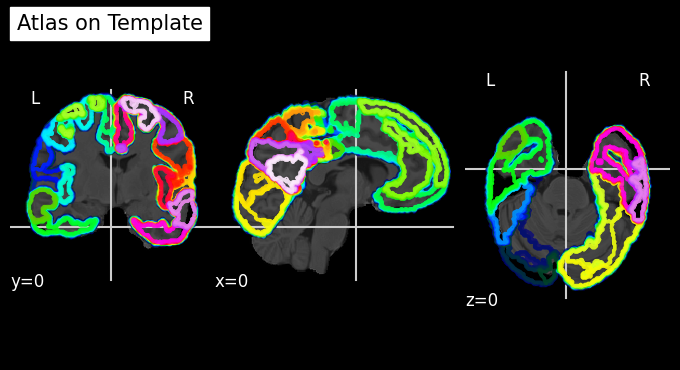

In [4]:
atlas2BoldinT1w_img=nib.load(atlas2BoldinT1w)
atlas2T1w_img=nib.load(atlas2T1w)
#, bg_img=atlas2BoldinT1w_img  , atlas2T1w_data
atlas_img=nib.load('/home/mina94/scratch/fixSeed_threads/overlappingTest/atlas.nii.gz')
T1w_img=nib.load(T1w)
print(atlas2T1w_img.shape)
print(atlas2BoldinT1w_img.shape)
# Display the atlas overlaid on the template
plotting.plot_roi(atlas2BoldinT1w_img, bg_img=T1w_img, title="Atlas on Template", display_mode='ortho',view_type="contours") #cut_coords=(0, 0, 0)

plotting.show()

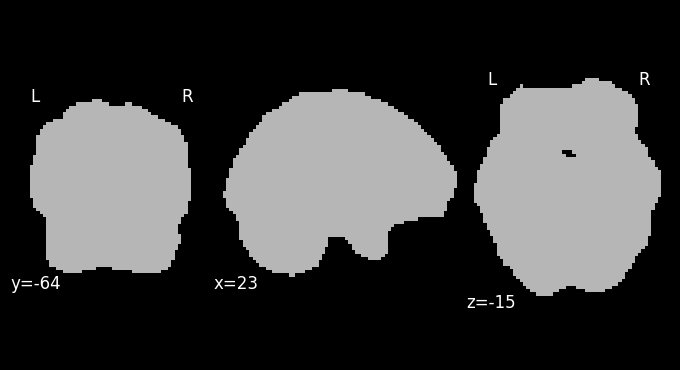

In [11]:
bold_brainMask_img=nib.load(bold_brainMask)
plot = nilearn.plotting.plot_anat(bold_brainMask_img, cut_coords=(23,-64,-15),draw_cross=False)

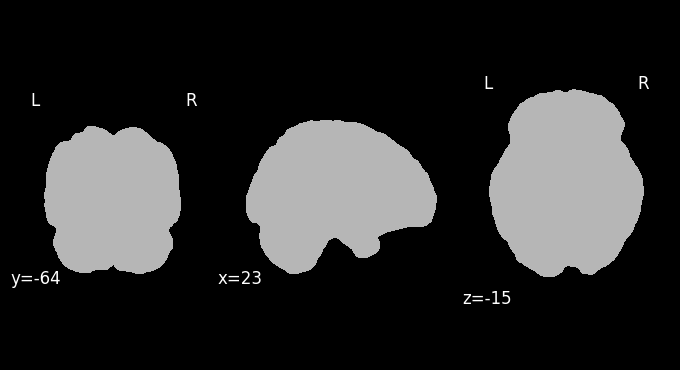

In [9]:
T1w_brainMask_img=nib.load(T1w_brainMask)
plot = nilearn.plotting.plot_anat(T1w_brainMask_img, cut_coords=(23,-64,-15),draw_cross=False)

In [57]:
from nilearn.image import resample_to_img
from sklearn.metrics import jaccard_score

# Resample atlas to template
atlas_resampled = resample_to_img(atlas.maps, template)

# Load data from both images
atlas_data = atlas_resampled.get_fdata().astype(bool).flatten()
template_data = (template_img.get_fdata() > 0).astype(bool).flatten()  # Assuming template is binary

# Calculate Jaccard similarity index (equivalent to Dice coefficient for binary data)
overlap = jaccard_score(atlas_data, template_data)
print(f'Dice Coefficient: {2 * overlap / (1 + overlap)}')

AttributeError: 'str' object has no attribute 'maps'

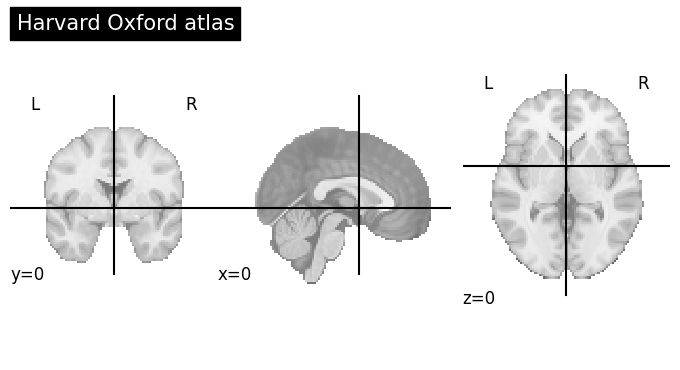

In [58]:
plotting.plot_roi(atlas_img==900, title="Harvard Oxford atlas")

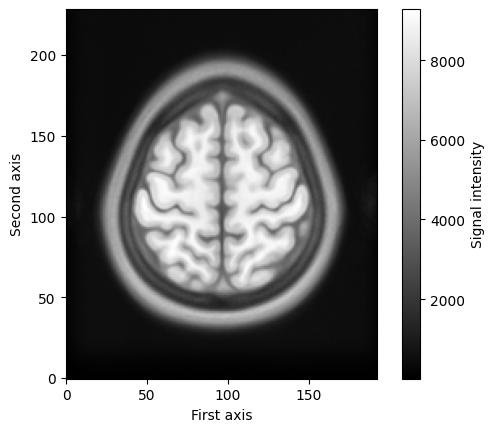

In [59]:
atlas2BoldinT1w_img=nib.load(atlas2BoldinT1w)
plt.imshow(atlas2BoldinT1w_img, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

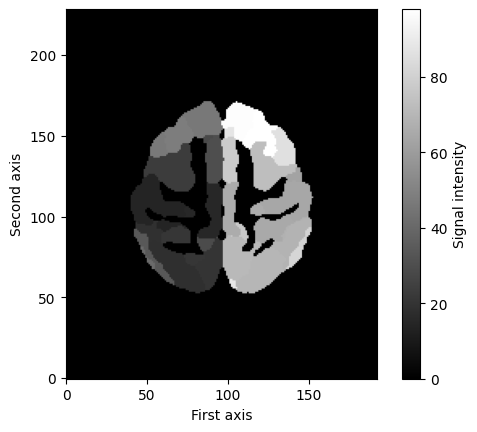

In [60]:
plt.imshow(atlas_data[:,:,138].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [61]:
import numpy as np

# Check if any voxel equals 10
if np.any(nilearn.image.get_data(atlas_img)== 98):
    print("There is at least one voxel with a value of 10 in the atlas.")
else:
    print("No voxel has a value of 10 in the atlas.")

There is at least one voxel with a value of 10 in the atlas.


In [63]:
# # the integer values in the atlas image correspond to different regions.
# mask_img = nilearn.image.new_img_like(atlas_img, nilearn.image.get_data(atlas_img) == 10)
# masker = nilearn.input_data.NiftiMasker(mask_img=mask_img).fit()
# fmri_img=nib.load(func)

# time_series = masker.fit_transform(fmri_img, confounds)



In [64]:
fmri_img=nib.load(func)
# Initialize the NiftiLabelsMasker with some standard options for preprocessing
masker = nilearn.input_data.NiftiLabelsMasker( atlas_img, standardize=True, smoothing_fwhm=6,memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(fmri_img, confounds)


[NiftiLabelsMasker.wrapped] loading data from Nifti1Image('/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9d036c1b50>, <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x7f9d029a9d10>, 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7f9d02c1b890>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': 6,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target

In [65]:
print(type(time_series))
print(time_series.shape )

<class 'numpy.ndarray'>
(420, 100)


In [ ]:
masker

NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f9d06110d90>)

In [69]:
import pandas as pd

# Define the path to your TSV file
tsv_file_path = "/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.tsv"

# Read the TSV file into a DataFrame
atlas_data = pd.read_csv(tsv_file_path, delimiter='\t')
atlas_data
roi_indices=[1,33,56,73,94]
roi_labels=['7Networks_LH_Vis_1', '7Networks_LH_Limbic_TempPole_2','7Networks_RH_Vis_6','7Networks_RH_DorsAttn_FEF_2','7Networks_RH_Default_PFCv_1']
# Display the DataFrame
print(atlas_data[atlas_data['index']==1]['name'])


0    7Networks_LH_Vis_1
Name: name, dtype: object


In [70]:
atlas_labels=atlas_data['name'].tolist()
print(type(atlas_labels))

<class 'list'>


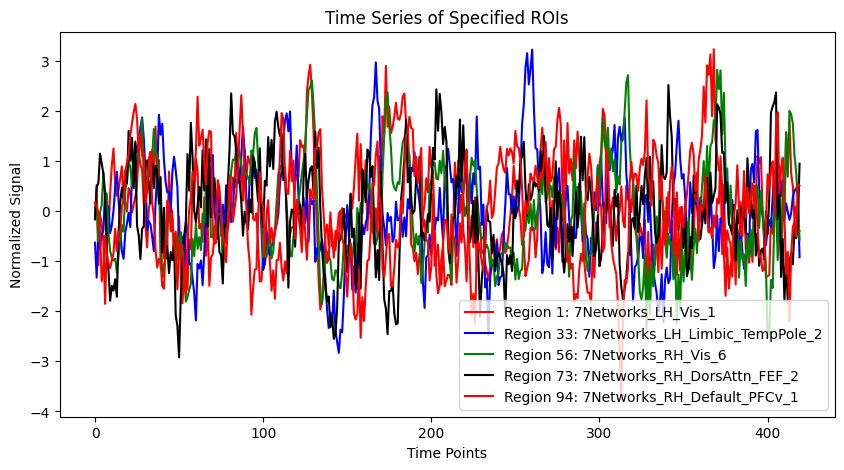

In [71]:
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'black']

# Plotting the time series of the specified regions
plt.figure(figsize=(10, 5))
# print(time_series.shape)
for i, ts in enumerate(roi_indices):
    # print(i)
    # print(len(roi_indices))
    # print(roi_indices[i], roi_labels[i])
    color = colors[i % len(colors)]
    plt.plot(time_series.T[ts], label=f'Region {roi_indices[i]}: {roi_labels[i]}', color=color)
plt.title('Time Series of Specified ROIs')
plt.xlabel('Time Points')
plt.ylabel('Normalized Signal')
plt.legend()
plt.show()


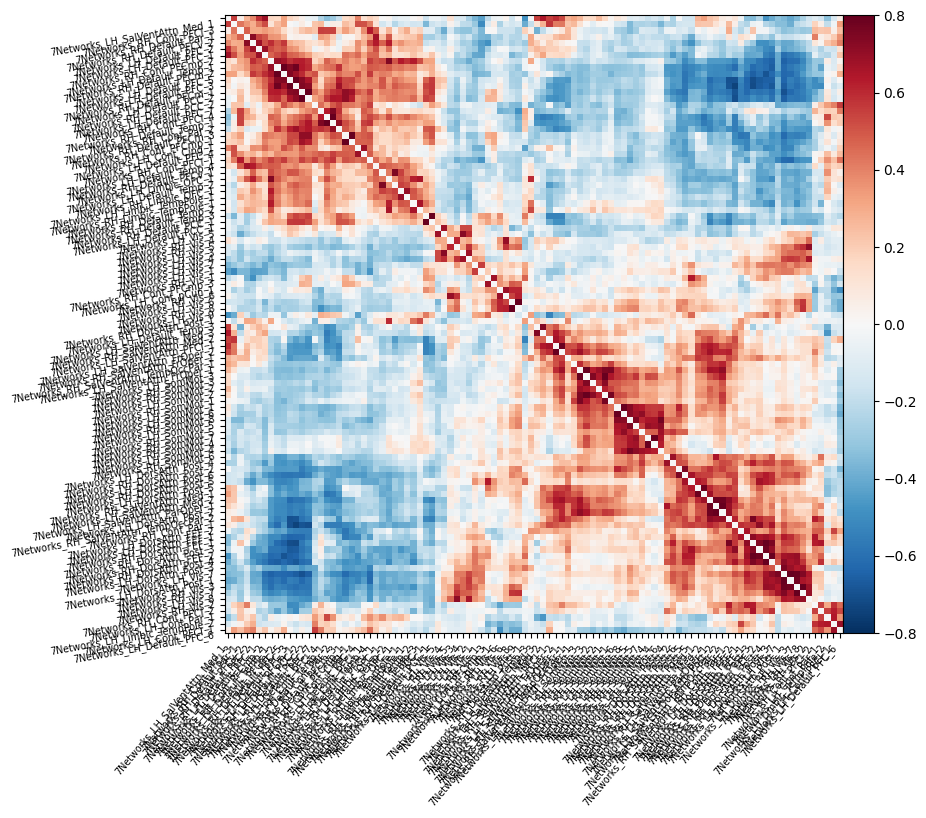

In [72]:
from nilearn.connectome import ConnectivityMeasure
import numpy as np
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# Plot correlation matrix - note: matrix is ordered for block-like representation
plotting.plot_matrix(correlation_matrix,figure=(8,8),labels=atlas_labels,
                     vmax=0.8, vmin=-0.8, reorder=True);